# Numerical Solutions for the Bethe Equations

## Goal

Solve the system of equations

$z_1^L = -\frac{1 + z_1 z_2 - \Delta z_1}{1 + z_1 z_2 - \Delta z_2}$


$z_2^L = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

and check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B_1(z_1, z_2)B_2(z_1, z_2)}{z_1^{y_1+1}z_2^{y_2+1}}\left(z_1^{x_1} z_2^{x_2} +A(z_1, z_2) z_1^{x_2} z_2^{x_1} \right)$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_1051/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


### Example: Finding roots

The code below finds the roots of the polynomial $z^2-1$.

In [2]:
coeff = [1, 0, -1]
sol = np.roots(coeff)
print(sol)

[-1.  1.]


## Numerical Solutions

We solve the system of equations by a fix point method: 

$(z_{1,n}, z_{2,n}) \rightarrow (z_1, z_2)$ as $n\rightarrow \infty$.

The sequence converges to a solution. We define the sequence as follows:

$z_{1, n+1} = A^{-1/L}(z_{1, n}, z_{2,n})$ and $z_{2, n+1} = A^{1/L}(z_{1, n}, z_{2,n})$.

Since there are $L$ roots of unity, we have to make a choice of which root to pick and we pick the one that is closest to the previous one. That is, we are looking for the roots of the polynomials

$z_{1, n+1}^{L} - A^{-1}(z_{1, n}, z_{2,n})$ and $z_{2, n+1}^L - A(z_{1, n}, z_{2,n})$

with respect to $z_{n+1}$.

### Defining the constant coefficient

We define the $A(z_1, z_2)$ and $A^{-1}(z_1, z_2)$ as the coefficients $c1$ and $c2$ for the pair of polynomial equations.

In [3]:
def c2(z1, z2, d):
    return -(1 + z1*z2 - d*z2)/(1+ z1*z2 - d*z1)

def c1(z1, z2, d):
    return -(1 + z1*z2 - d*z1)/(1+z1*z2 - d*z2)

In [4]:
c1(2, 3, 4)

-0.2

In [5]:
c2(2,3,4)

-5.0

In [6]:
c1(2, 3, 4)*c2(2, 3, 4)

1.0

### Defining the polynomial

A polynomial is defined as a list of coefficients. The polynimials that we are trying to solve

$z_1^L - c1 =0$  and $z_2^L - c_2=0$

corresponds to the list

[1, 0, ... , 0, -c1] and [1, 0, ... , -c2].

We define a functions below to give such lists.

In [7]:
def pol_coeff1(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c1(z1, z2, d))
    return coeff

In [8]:
pol_coeff1(5, 2, 3, 4)
np.roots(pol_coeff1(5, 2, 3, 4))

array([-0.72477966+0.j        , -0.22396923+0.68930642j,
       -0.22396923-0.68930642j,  0.58635907+0.4260148j ,
        0.58635907-0.4260148j ])

In [9]:
def pol_coeff2(l, z1, z2, d):
    coeff = [1]
    for i in range(l-1):
        coeff.append(0)
    coeff.append(-c2(z1, z2, d))
    return coeff

In [10]:
pol_coeff2(5, 2, 3, 4)

[1, 0, 0, 0, 0, 5.0]

In [11]:
pol_coeff2(2, 1, 1, 0)

[1, 0, 1.0]

### Finding close solutions

When we obtain the solutions of the polynomial equations, we obtain $L$ solutions but we are only interested in the solution that is closest to the previous element of the sequence $(z_{1,n}, z_{2,n})$. The code below solves the polynomials and returns the "closest" solutions.

In [12]:
def close_sol1(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff1(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s


In [13]:
close_sol1(2, 1j, -1j, 0.1, 1j)

(0.049937616943892205+0.9987523388778446j)

In [14]:
def close_sol2(l, z1, z2, d, s ):
    sols = np.roots(pol_coeff2(l, z1, z2, d))
    sols = [x-s for x in sols]
    return min(sols, key=np.abs) + s

In [15]:
close_sol2(2, 1j, -1j, 0.1, 1j)

(-0.04993761694389226+0.9987523388778448j)

### Setting up a recursion

We now set up a recursion to give us the an arbitrary element of the sequence $(z_{1,n}, z_{2,n})$. The starting point of the recursion is label by an index $(k_1, k_2)$ so that $k_i \in \{1, \dots, L\}$ and 

$(z_{1,0}, z_{2,0}) = (e^{2 \pi i k_1/L}, e^{2\pi i k_2/L})$,

i.e. the solutions of the system of equations with $\Delta = 0$.

Notation: n= trails.

In [16]:
l=5
sol = np.roots(pol_coeff1(l, 0, 0, 0))
print(sol)
z= [sol[1], sol[2]]
print(z)


[-1.        +0.j         -0.30901699+0.95105652j -0.30901699-0.95105652j
  0.80901699+0.58778525j  0.80901699-0.58778525j]
[(-0.3090169943749479+0.9510565162951541j), (-0.3090169943749479-0.9510565162951541j)]


In [17]:
d=.1
z= [close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
print(z)

[(-0.2911619922237325+0.9566737658597665j), (-0.2911619922237325-0.9566737658597665j)]


In [18]:
def sol_sys(l, d, k1, k2, trails):
    sol = np.roots(pol_coeff1(l, 0, 0, 0))
    z = [sol[k1], sol[k2]]
    for i in range(trails):
        z=[close_sol1(l , z[0], z[1], d, z[0]), close_sol2(l, z[0], z[1], d, z[1])]
    return (z[0], z[1])

In [19]:
sol_sys(5, 0.1, 1, 2, 30)

((-0.2910397456371135+0.956710962861556j),
 (-0.2910397456371135-0.956710962861556j))

In [20]:
sol_sys(5, 0.1, 0, 1, 30)

((-0.9999004932239454-0.01410686536793182j),
 (-0.2955698188574211+0.955321140863423j))

In [21]:
sol_sys(5, 10, 0, 1, 30)

((-0.9434203418185536-0.33159924403255625j),
 (0.023836703374754385+0.9997158654198816j))

### Checking the solution

We check the solution by showing that 

$z_{1,n}^L - A^{-1}(z_n)$ and $z_{2,n}^{L} - A(z_n)$

are close to zero.

Notation: n= trails.

In [22]:
l=5
d=0.1
k1=1
k2=4
trails=30
z= sol_sys(l, d, k1, k2, trails)
print(z[0]**l - c1(z[0], z[1], d))
print(z[1]**l- c2(z[0], z[1], d))

(-6.661338147750939e-16-2.789435349370706e-15j)
(-8.881784197001252e-16-8.604228440844963e-16j)


### Checking that all solutions are different

We check that all the solutions labelled by the indexes $(k_1, k_2)$ with $k_i \in \{1, \dots, L\}$ are distinct. This proves that we have found all the different solutions.

In [23]:
[(i,j) for i in range(l) for j in range(i+1, l)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [24]:
l=5
d=.1
trails=300
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
print(all_sol)

[((-0.9999004932239464-0.014106865367932042j), (-0.29556981885742145+0.9553211408634232j)), ((-0.9999004932239464+0.014106865367932042j), (-0.29556981885742145-0.9553211408634232j)), ((-0.9982161702461371-0.05970324496318047j), (0.8426665326923638+0.5384358036760087j)), ((-0.9982161702461371+0.05970324496318047j), (0.8426665326923638-0.5384358036760087j)), ((-0.29556981885742145+0.9553211408634232j), (-0.9999004932239464-0.014106865367932042j)), ((-0.2910397456371135+0.956710962861556j), (-0.2910397456371135-0.956710962861556j)), ((-0.2695024611955084+0.9629997006279731j), (0.7840690931242289+0.6206735512387719j)), ((-0.28631282465912894+0.9581361940954486j), (0.8227661423655492-0.5683800444921631j)), ((-0.29556981885742145-0.9553211408634232j), (-0.9999004932239464+0.014106865367932042j)), ((-0.2910397456371135-0.956710962861556j), (-0.2910397456371135+0.956710962861556j)), ((-0.28631282465912894-0.9581361940954486j), (0.8227661423655492+0.5683800444921631j)), ((-0.2695024611955084-0.

In [25]:
diff =[abs(x[0]-y[0])+abs(x[1]-y[1]) for x in all_sol for y in all_sol if x != y]
diff.sort()
print(diff)

[1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1777914280376254, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1822471185531238, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1841391914090127, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1844982406343079, 1.1962780972783784, 1.1962780972783784, 1.1962780972783784, 1.1962780972783784, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2071828873025654, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657, 1.2578054257784657,

### Plotting the solutions

We plot the solutions.

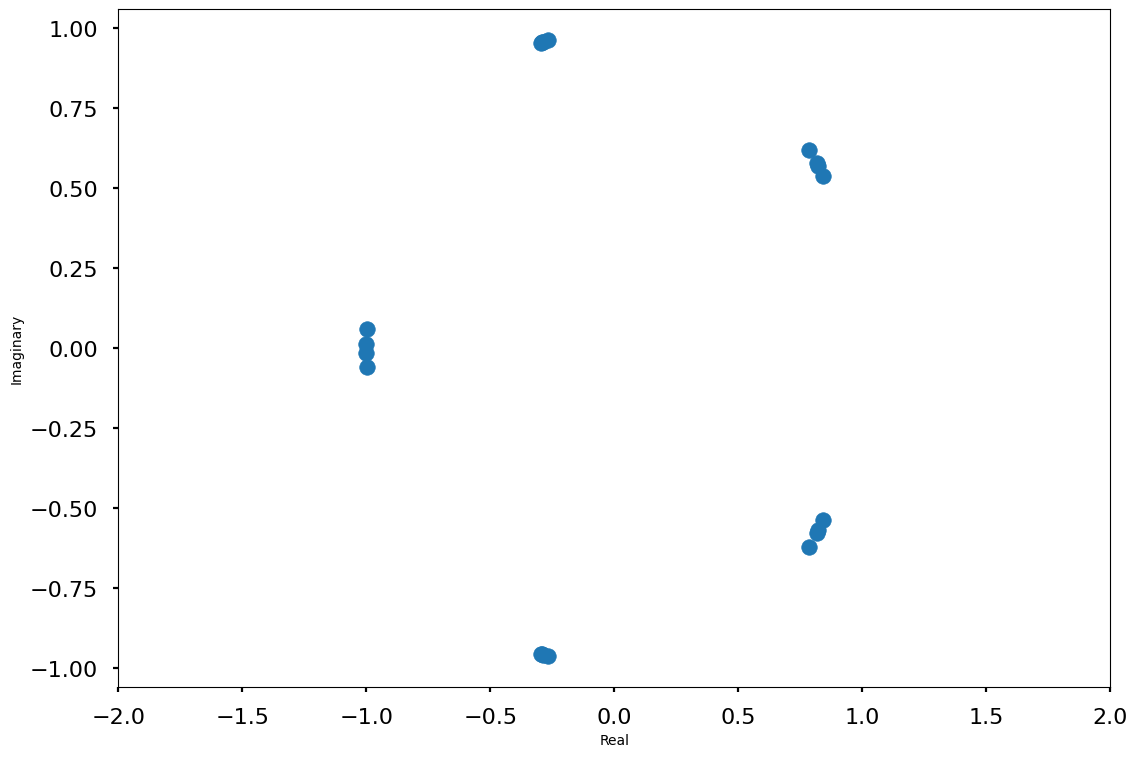

In [26]:
# import library
import matplotlib.pyplot as plt


# extract real part
x = [ele[1].real for ele in all_sol]
# extract imaginary part
y = [ele[1].imag for ele in all_sol]

# plot the complex numbers
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.xlim([-2,2])
plt.show()


## Checking the initial conditons

We check the identity

$\mathbf{1}((x_1 < x_2) = (y_1 < y_2) \mod L) = \sum_{z \in Sol} \frac{B_1(z_1, z_2)B_2(z_1, z_2)}{z_1^{y_1+1}z_2^{y_2+1}}\left(z_1^{x_1} z_2^{x_2} +A(z_1, z_2) z_1^{x_2} z_2^{x_1} \right)$

with 

$B_1(z_1, z_2) =\left( Lz_1^{L-1} + \frac{\Delta z_2 (z_1-z_2)}{(1 + z_1 z_2 -\Delta z_2)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta  z_2)}   \right)^{-1}$

$B_2(z_1, z_2) =\left( Lz_2^{L-1} + \frac{\Delta z_1 (z_2-z_1)}{(1 + z_1 z_2 -\Delta z_1)^2} -\frac{\Delta}{(1 + z_1 z_2 -\Delta z_1 )}   \right)^{-1}$

$A(z_1, z_2) = -\frac{1 + z_1 z_2 - \Delta z_2}{1 + z_1 z_2 - \Delta z_1}$

so that $Sol$ is the set of all the solution to the system of equations above.

### Define A(z1, z2) function

In [27]:
def A(z1, z2, d):
    return (-1)* (1 + z1*z2 - d*z2)/(1 + z1 *z2 - d*z1)

In [28]:
A(1,2,4)

-5.0

In [29]:
d=0.1
A(all_sol[1][0], all_sol[1][1], d)


(-0.9975133206205744-0.07047818942421406j)

In [30]:
d=0.1
[A(sol[0], sol[1],d) for sol in all_sol]

[(-0.9975133206205744+0.07047818942421406j),
 (-0.9975133206205744-0.07047818942421406j),
 (-0.955721667149654+0.2942721443505743j),
 (-0.955721667149654-0.2942721443505743j),
 (-0.9975133206205743-0.07047818942421415j),
 (-0.9955637246025222-0.09408969261058067j),
 (-0.9787720322818798-0.20495196711132008j),
 (-0.9929379799478917-0.11863459856635383j),
 (-0.9975133206205743+0.07047818942421415j),
 (-0.9955637246025222+0.09408969261058067j),
 (-0.9929379799478917+0.11863459856635383j),
 (-0.9787720322818798+0.20495196711132008j),
 (-0.9557216671496547-0.2942721443505744j),
 (-0.9787720322818787+0.20495196711131983j),
 (-0.9929379799478918-0.11863459856635387j),
 (-0.9981861191474779-0.060203584123347934j),
 (-0.9557216671496547+0.2942721443505744j),
 (-0.9929379799478918+0.11863459856635387j),
 (-0.9787720322818787-0.20495196711131983j),
 (-0.9981861191474779+0.060203584123347934j)]

### Define B1 and B2 function

In [31]:
def B1 (z1, z2 ,l, d):
    b= -l* ((1+z1*z2- d*z1)/(1+z1*z2- d*z2))
    b = b+ (d* z2*z1 *(z1-z2)/((1+z1*z2- d*z2) *(1+z1*z2- d*z2)))
    b = b - ((d*z1)/(1+z1*z2- d*z2))
    b= 1/b
    return b

In [32]:
l=5
d=0.1
sol = all_sol[0]
B1(sol[0], sol[1], l,d)

(-0.20046242430693717+0.014163448668486988j)

In [33]:
l=5
d=0.1
[B1(sol[0], sol[1], l,d) for sol in all_sol]

[(-0.20046242430693717+0.014163448668486988j),
 (-0.20046242430693717-0.014163448668486988j),
 (-0.17781807899531904+0.05475119923388591j),
 (-0.17781807899531904-0.05475119923388591j),
 (-0.20244745463856548-0.0143036987692458j),
 (-0.19977317853332502-0.01888035541626803j),
 (-0.1777028627565809-0.03721045359087801j),
 (-0.1961819128957976-0.023439492649474182j),
 (-0.20244745463856548+0.0143036987692458j),
 (-0.19977317853332502+0.01888035541626803j),
 (-0.1961819128957976+0.023439492649474182j),
 (-0.1777028627565809+0.03721045359087801j),
 (-0.21217143611525432-0.06532879354068258j),
 (-0.20480981299727366+0.04288656875455555j),
 (-0.19965308954978217-0.023854223133366003j),
 (-0.19799025823438787-0.01194138341394453j),
 (-0.21217143611525432+0.06532879354068258j),
 (-0.19965308954978217+0.023854223133366003j),
 (-0.20480981299727366-0.04288656875455555j),
 (-0.19799025823438787+0.01194138341394453j)]

In [34]:
def B2 (z1, z2 ,l, d):
    b= -l* ((1+z1*z2- d*z2)/(1+z1*z2- d*z1))
    b = b+ (d* z1 *z2*(z2-z1)/((1+z1*z2- d*z1) *(1+z1*z2- d*z1)))
    b = b - ((d*z2)/(1+z1*z2- d*z1))
    b= 1/b
    return b

In [35]:
l=5
d=0.1
[B2(sol[0], sol[1], l,d) for sol in all_sol]

[(-0.20244745463856548-0.0143036987692458j),
 (-0.20244745463856548+0.0143036987692458j),
 (-0.21217143611525432-0.06532879354068258j),
 (-0.21217143611525432+0.06532879354068258j),
 (-0.20046242430693717+0.014163448668486988j),
 (-0.19977317853332502+0.01888035541626803j),
 (-0.20480981299727366+0.04288656875455555j),
 (-0.19965308954978217+0.023854223133366003j),
 (-0.20046242430693717-0.014163448668486988j),
 (-0.19977317853332502-0.01888035541626803j),
 (-0.19965308954978217-0.023854223133366003j),
 (-0.20480981299727366-0.04288656875455555j),
 (-0.17781807899531904+0.05475119923388591j),
 (-0.1777028627565809-0.03721045359087801j),
 (-0.1961819128957976+0.023439492649474182j),
 (-0.19799025823438787+0.01194138341394453j),
 (-0.17781807899531904-0.05475119923388591j),
 (-0.1961819128957976-0.023439492649474182j),
 (-0.1777028627565809+0.03721045359087801j),
 (-0.19799025823438787-0.01194138341394453j)]

### Alternate definitions of B1 and B2

In [36]:
def C1(z1, z2, l, d):
    return - (z1/l)

def C2(z1, z2, l, d):
    c= (1/z1) + z1 -d
    c= c+ (1/z2) + z2 -d 
    c = c/(1 + z1*z2 -d*z1)
    c = c/(1+z1*z2 - d*z2)
    c = c*d*z1
    c= -c - (l/z2)
    c=1/c
    return c

In [37]:
l=5
d=0.1
[C1(sol[0], sol[1], l,d) for sol in all_sol]

[(0.19998009864478927+0.0028213730735864085j),
 (0.19998009864478927-0.0028213730735864085j),
 (0.19964323404922743+0.011940648992636095j),
 (0.19964323404922743-0.011940648992636095j),
 (0.05911396377148429-0.19106422817268465j),
 (0.0582079491274227-0.19134219257231122j),
 (0.053900492239101684-0.19259994012559464j),
 (0.05726256493182579-0.19162723881908972j),
 (0.05911396377148429+0.19106422817268465j),
 (0.0582079491274227+0.19134219257231122j),
 (0.05726256493182579+0.19162723881908972j),
 (0.053900492239101684+0.19259994012559464j),
 (-0.16853330653847276-0.10768716073520175j),
 (-0.15681381862484578-0.12413471024775438j),
 (-0.16455322847310985-0.11367600889843262j),
 (-0.16320794912742267-0.11559915804892623j),
 (-0.16853330653847276+0.10768716073520175j),
 (-0.16455322847310985+0.11367600889843262j),
 (-0.15681381862484578+0.12413471024775438j),
 (-0.16320794912742267+0.11559915804892623j)]

In [38]:
l=5
d=0.1
[C2(sol[0], sol[1], l,d) for sol in all_sol]

[(0.060279386189431614-0.19483102912078248j),
 (0.060279386189431614+0.19483102912078248j),
 (-0.17270607756916773-0.11035342222334897j),
 (-0.17270607756916773+0.11035342222334897j),
 (0.20392267456483573+0.002876995996151054j),
 (0.0585953720390914+0.19261573597115453j),
 (-0.14830566973472764-0.11739961122088693j),
 (-0.16342140653230405+0.11289412815255892j),
 (0.20392267456483573-0.002876995996151054j),
 (0.0585953720390914-0.19261573597115453j),
 (-0.16342140653230405-0.11289412815255892j),
 (-0.14830566973472764+0.11739961122088693j),
 (0.20458626590818343+0.012236291410313292j),
 (0.050976047077045845-0.1821501661121407j),
 (0.056868704367812294+0.19030919774895097j),
 (-0.16053711961190692+0.1137074263965372j),
 (0.20458626590818343-0.012236291410313292j),
 (0.056868704367812294-0.19030919774895097j),
 (0.050976047077045845+0.1821501661121407j),
 (-0.16053711961190692-0.1137074263965372j)]

### Alternate definitions of B1 and B2

In [39]:
def D1(z1, z2, l, d):
    x = 1 + z2*z2 - d* z2
    x= x/(1 +z1 *z2 - d*z2)
    x= x/(1+z1*z2 - d*z1)
    x = x*d
    x= 1/x
    return x
def D2(z1, z2, l, d):
    x= l/(z1*z2*d)
    x = x*(1+z1*z2 - d*z1)*(1+z1*z2- d*z2)
    x = x/ (1 + z2*z2 - d*z2)
    x= x + (1/z1)*((1 +z1*z1 - d*z1)/(1 +z2*z2 - d*z2)) + (1/z2)
    x= (-l)*x
    x= 1/x
    return(x)


In [40]:
l=5
d=0.1
[D1(sol[0], sol[1], l,d) for sol in all_sol]

[(41.769283728345876+0.5892923006477796j),
 (41.769283728345876-0.5892923006477796j),
 (-2.6639275527295316-0.15932933565438662j),
 (-2.6639275527295316+0.15932933565438662j),
 (4.063946634032783-13.135218439556155j),
 (17.607200462477877-57.87869856358778j),
 (-0.5306067965248894+1.8959907970337562j),
 (-4.669725432534032+15.627078384370979j),
 (4.063946634032783+13.135218439556155j),
 (17.607200462477877+57.87869856358778j),
 (-4.669725432534032-15.627078384370979j),
 (-0.5306067965248894-1.8959907970337562j),
 (-1.7005649430950165-1.0866042690850457j),
 (-3.5467219194289563-2.8076052331265715j),
 (-30.83412390945379-21.300707232731185j),
 (19.620072264794743+13.896773084861188j),
 (-1.7005649430950165+1.0866042690850457j),
 (-30.83412390945379+21.300707232731185j),
 (-3.5467219194289563+2.8076052331265715j),
 (19.620072264794743-13.896773084861188j)]

In [41]:
l=5
d=0.1
[D2(sol[0], sol[1], l,d) for sol in all_sol]

[(-0.00028860149182374323+0.0009327985769647974j),
 (-0.00028860149182374323-0.0009327985769647974j),
 (-0.012943144730244894-0.008270237709165669j),
 (-0.012943144730244894+0.008270237709165669j),
 (-0.0029662489894577222-4.184863936523149e-05j),
 (-0.00019371145583434827-0.0006367716994216663j),
 (-0.015065296285130782-0.011925774179540098j),
 (-0.0020039569859096147+0.001384365620025277j),
 (-0.0029662489894577222+4.184863936523149e-05j),
 (-0.00019371145583434827+0.0006367716994216663j),
 (-0.0020039569859096147-0.001384365620025277j),
 (-0.015065296285130782+0.011925774179540098j),
 (-0.020275379664779335-0.0012126691541665547j),
 (-0.002253841373004599+0.00805353894668844j),
 (-0.0003034926152040659-0.0010156277827020042j),
 (-0.0013354147577578845+0.0009458658261945164j),
 (-0.020275379664779335+0.0012126691541665547j),
 (-0.0003034926152040659+0.0010156277827020042j),
 (-0.002253841373004599-0.00805353894668844j),
 (-0.0013354147577578845-0.0009458658261945164j)]

In [42]:
l=5
d=0.1
[D1(sol[0], sol[1], l,d)*D2(sol[0], sol[1], l,d) for sol in all_sol]

[(-0.012604368615870384+0.0387922577855527j),
 (-0.012604368615870384-0.0387922577855527j),
 (0.03316190838596019+0.024093536752217683j),
 (0.03316190838596019-0.024093536752217683j),
 (-0.01260436861587038+0.0387922577855527j),
 (-0.04026623367940394+5.204170427930421e-18j),
 (0.030604906692462384-0.022235766277709786j),
 (-0.012275661153956964-0.03778060024147514j),
 (-0.01260436861587038-0.0387922577855527j),
 (-0.04026623367940394-5.204170427930421e-18j),
 (-0.012275661153956964+0.03778060024147514j),
 (0.030604906692462384+0.022235766277709786j),
 (0.03316190838596019+0.024093536752217676j),
 (0.030604906692462387-0.02223576627770979j),
 (-0.01227566115395697+0.03778060024147516j),
 (-0.039345416806033005+3.469446951953614e-18j),
 (0.03316190838596019-0.024093536752217676j),
 (-0.01227566115395697-0.03778060024147516j),
 (0.030604906692462387+0.02223576627770979j),
 (-0.039345416806033005-3.469446951953614e-18j)]

### Alternate definitions of B1 and B2

In [54]:
def E1(z1, z2, l, d):
    e= 1 +z2*z2 - d*z2
    e = e/((1 + z1 *z2 - d*z1)*(1 + z1*z2 - d*z2))
    e = d*e
    e = e + (l/z1)
    e = -1/e
    return e

def E2(z1, z2, l, d):
    e= (1 + z1 *z2 - d*z1)*(1 + z1*z2 - d*z2)
    e = e/(1 + z1*z1 - d*z1)
    e= e*(l/d) + z1*((1+ z2*z2 -d*z2)/(1+ z1*z1 -d*z1))
    e= 1/e
    e = e + (1/z2)
    e = (-l)*e
    e = 1/e
    return e

In [55]:
l=5
d=0.1
[E1(sol[0], sol[1], l,d)*E2(sol[0], sol[1], l,d) for sol in all_sol]

[(0.012588135839343964-0.03874229843647471j),
 (0.012588135839343964+0.03874229843647471j),
 (-0.03242601102261063-0.023558876021497217j),
 (-0.03242601102261063+0.023558876021497217j),
 (0.01258813583934397-0.03874229843647472j),
 (0.04015039586435207-8.673617379884035e-19j),
 (-0.032426011022610605+0.023558876021497192j),
 (0.012204098483466146+0.03756035298862926j),
 (0.01258813583934397+0.03874229843647472j),
 (0.04015039586435207+8.673617379884035e-19j),
 (0.012204098483466146-0.03756035298862926j),
 (-0.032426011022610605-0.023558876021497192j),
 (-0.03242601102261062-0.02355887602149721j),
 (-0.03242601102261062+0.0235588760214972j),
 (0.012204098483466146-0.03756035298862927j),
 (0.03927729441353155-3.469446951953614e-18j),
 (-0.03242601102261062+0.02355887602149721j),
 (0.012204098483466146+0.03756035298862927j),
 (-0.03242601102261062-0.0235588760214972j),
 (0.03927729441353155+3.469446951953614e-18j)]

### Define a function for the terms inside the summation

In [84]:
def term_ic(x1, x2, y1, y2, l, d, sol):
    term =0
    #term = B1(sol[0], sol[1], l, d)* B2(sol[0], sol[1], l, d)
    #term = C1(sol[0], sol[1], l, d)* C2(sol[0], sol[1], l, d)
    term = (D1(sol[0], sol[1], l, d)* D2(sol[0], sol[1], l, d))
    #term = (E1(sol[0], sol[1], l, d)* E2(sol[0], sol[1], l, d))
    term = term/((sol[0]**(y1+1)) *(sol[1]**(y2+1)))
    term = term*((sol[0]**x1)*(sol[1]**x2) + A(sol[0], sol[1], d)*(sol[0]**x2)*(sol[1]**x1) )
    return term

In [44]:
l=5
d=0.1
sol = all_sol[1]
term_ic(1, 2, 1, 2, l, d, sol)

(-0.02655423565679818-0.03822423870662445j)

In [45]:
l=5
d=0.1
[term_ic(1, 2, 1, 2, l, d, sol) for sol in all_sol]

[(-0.02655423565679818+0.03822423870662445j),
 (-0.02655423565679818-0.03822423870662445j),
 (-0.06932627263138794+0.02961903905824441j),
 (-0.06932627263138794-0.02961903905824441j),
 (-0.026554235656798167-0.03822423870662449j),
 (-0.07145284072841439-0.025470867976866606j),
 (-0.030673727368612038+0.037146749865865025j),
 (-0.07344576434320182+0.020999218160124775j),
 (-0.026554235656798167+0.03822423870662449j),
 (-0.07145284072841439+0.025470867976866606j),
 (-0.07344576434320182-0.020999218160124775j),
 (-0.030673727368612038-0.037146749865865025j),
 (-0.06932627263138799-0.029619039058244482j),
 (-0.03067372736861207-0.03714674986586489j),
 (-0.07344576434320187+0.02099921816012478j),
 (-0.02854715927158561+0.03783463304778063j),
 (-0.06932627263138799+0.029619039058244482j),
 (-0.07344576434320187-0.02099921816012478j),
 (-0.03067372736861207+0.03714674986586489j),
 (-0.02854715927158561-0.03783463304778063j)]

### Define a function for the summation

In [46]:
def F_ic(x1, x2, y1, y2, l, d, all_sol):
    terms = [term_ic(x1, x2, y1, y2, l, d, sol) for sol in all_sol]
    return sum(terms)

In [47]:
l=5
d=0.1
x1=1
x2=3
y1=1
y2=2
F_ic(x1, x2, y1, y2, l,d, all_sol)

(-3.5388358909926865e-16-6.938893903907228e-18j)

### We check the identity

We set the parameters. The last list is a list of all possible coordinates.

In [125]:
l=5
d=.7125
y1=1
y2=2
X= [(i+1, j+1) for i in range(l) for j in range(l) if i<j]


0 trails

In [59]:
trails=0
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0013289119482685-6.938893903907228e-18j), (-0.008420097221389158+6.938893903907228e-18j), (-0.03800824143022213-1.3877787807814457e-17j), (0.005895606660810421+0j), (-0.0010011908140309562+1.3877787807814457e-17j), (0.005261525773753287+0j), (0.0392400547916907+0j), (0.00041878158235508084-6.938893903907228e-18j), (-0.0020825711503803662-6.938893903907228e-18j), (0.00041878158235542084-6.938893903907228e-18j)]
(1.0030515617232107-2.0816681711721685e-17j)


1 trail

In [60]:
trails=1
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(0.9987260267594582-6.938893903907228e-18j), (-0.0003926245824683386+6.938893903907228e-18j), (-0.0006976144868968207+6.938893903907228e-18j), (-0.0011503911929634202-6.938893903907228e-18j), (0.0008308153697949849+6.938893903907228e-18j), (0.001100011314496982-1.3877787807814457e-17j), (0.0002499523811176699-1.3877787807814457e-17j), (-0.00030399362490289225+0j), (-0.001734144587686462+0j), (-0.00030399362490336757-6.938893903907228e-18j)]
(0.9963240437250465-2.7755575615628914e-17j)


10 trails

In [61]:
trails=10
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(1.0000000000000053+6.938893903907228e-18j), (1.2836953722228372e-15-1.3877787807814457e-17j), (-7.28583859910259e-16+0j), (6.102757188486407e-15+0j), (-4.496403249731884e-15-3.469446951953614e-17j), (-5.245803791353865e-15-1.3877787807814457e-17j), (5.273559366969494e-16+0j), (2.4875934645507414e-15-6.938893903907228e-18j), (4.891920202254596e-15+6.938893903907228e-18j), (2.293304435241339e-15+0j)]
(1.0000000000000122-5.551115123125783e-17j)


100 trails

In [126]:
trails=900
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(-0.9999999999999992+6.938893903907228e-18j), (-9.08995101411847e-16-6.938893903907228e-18j), (-6.38378239159465e-16-1.3877787807814457e-17j), (2.3592239273284576e-16+6.938893903907228e-18j), (-1.2351231148954867e-15-2.0816681711721685e-17j), (7.771561172376096e-16+0j), (1.6930901125533637e-15+1.3877787807814457e-17j), (2.2343238370581275e-15-1.3877787807814457e-17j), (-1.734723475976807e-16-1.3877787807814457e-17j), (-9.43689570931383e-16+0j)]
(-0.9999999999999987-4.163336342344337e-17j)


1000 trails

In [122]:
trails=9000
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(-1.142265947632101+0j), (0.012293136235712543+0j), (-0.24343393342076242+6.938893903907228e-18j), (-0.437960701158908+1.3877787807814457e-17j), (0.11509539991171173+3.469446951953614e-17j), (-0.03218485784454411-6.938893903907228e-18j), (0.09298403268324942-6.938893903907228e-18j), (-0.0439623213738098+6.938893903907228e-18j), (0.03978305767984386-6.938893903907228e-18j), (-0.043962869704541205+6.938893903907228e-18j)]
(-1.683615004624149+4.85722573273506e-17j)


In [123]:
trails=12000
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(-1.142263982360915-2.7755575615628914e-17j), (0.012739493278295017+6.938893903907228e-18j), (-0.2430490766153869-6.938893903907228e-18j), (-0.4382583657434396+1.3877787807814457e-17j), (0.11524334402681981+0j), (-0.0324626691974072+6.938893903907228e-18j), (0.09235682646663773+6.938893903907228e-18j), (-0.04420366525167574-6.938893903907228e-18j), (0.03978620884865433+6.938893903907228e-18j), (-0.0437203112222859-6.938893903907228e-18j)]
(-1.6838321977707038-6.938893903907228e-18j)


In [124]:
trails=20000
all_sol = [sol_sys(l, d, k1, k2, trails) for k1 in range(l) for k2 in range(l) if k1 != k2]
values= [F_ic(x[0], x[1], y1, y2, l,d, all_sol) for x in X]
print(values)
print(sum(values))

[(-0.9999999999999993-1.3808398868775384e-15j), (5.828670879282072e-16-7.632783294297951e-16j), (-4.3021142204224816e-16+1.3739009929736312e-15j), (-1.8665624601510444e-15+2.9629076969683865e-15j), (-1.3183898417423734e-16+1.0200174038743626e-15j), (-2.0122792321330962e-16+1.2559397966072083e-15j), (-1.214306433183765e-15-3.5388358909926865e-16j), (-3.8163916471489756e-16-3.8163916471489756e-16j), (1.0685896612017132e-15-1.339206523454095e-15j), (3.8163916471489756e-16-2.2898349882893854e-16j)]
(-1.0000000000000016+2.1649348980190553e-15j)
